In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
x1=np.array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377, 0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])
x2=np.array([ 0.13784849, -0.05672081,  1.53048402,  0.6639671 ,  0.06636203,-1.09596719,  0.98829064, -0.68083318, -0.1207237 , -0.26187014])
x3 =['A','B','A','C','C','A','A','B','C','B']
data=pd.DataFrame(data=list(zip(x1,x2,x3)),columns=['age','weight','label'])

In [6]:
data.to_csv('xxx.csv',index=False)

In [7]:
data.loc[data['label']=='A']

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A


In [11]:
data.groupby('label').mean()

,age,weight
label,,
A,0.569471,0.390164
B,-0.154001,-0.333141
C,0.513632,0.203202


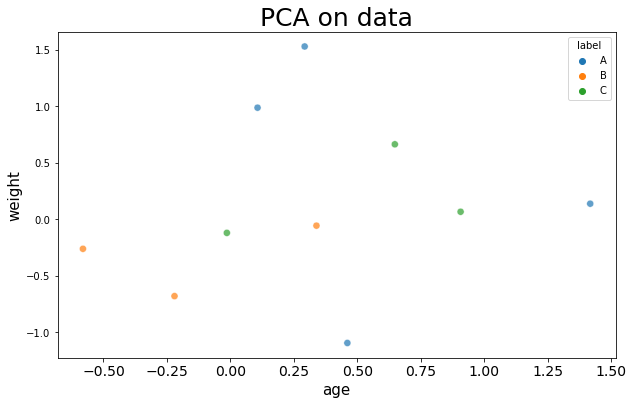

In [14]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "age", y = "weight", data = data, hue = "label", alpha = 0.7, s = 50); # s=size

plt.title('PCA on data', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("age", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

In [16]:
data.values

array([[1.41751313, 0.13784849, 'A'],
       [0.33904833, -0.05672081, 'B'],
       [0.29257167, 1.53048402, 'A'],
       [0.6478606, 0.6639671, 'C'],
       [0.90691377, 0.06636203, 'C'],
       [0.46082986, -1.09596719, 'A'],
       [0.10696884, 0.98829064, 'A'],
       [-0.22016277, -0.68083318, 'B'],
       [-0.01387787, -0.1207237, 'C'],
       [-0.58088736, -0.26187014, 'B']], dtype=object)

In [18]:
data['age'].values

array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377,
        0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])

In [22]:
data.sort_values(['label'],ascending=[True]) # data가 바뀌지는 않는다.  inplace=True 해야 바뀐다.

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

In [25]:
data

,age,weight,label
0,1.418,0.138,A
2,0.293,1.530,A
5,0.461,-1.096,A
6,0.107,0.988,A
1,0.339,-0.057,B
7,-0.220,-0.681,B
9,-0.581,-0.262,B
3,0.648,0.664,C
4,0.907,0.066,C
8,-0.014,-0.121,C
